In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
sns.set_style('darkgrid')

/kaggle/input/amazon-sales-dataset/Amazon.csv


In [2]:
amz = pd.read_csv('/kaggle/input/amazon-sales-dataset/Amazon.csv', encoding='utf-8')


# Data Dictionary
product_id: The unique identifier for each product.

product_name: The name of the product.

category: The category under which the product is listed, further divided into sub-categories separated by "|".

discounted_price: The price of the product after applying the discount.

actual_price: The original price of the product without any discount.

discount_percentage: The percentage of discount offered on the product.

rating: The average rating given to the product by the customers.

rating_count: The number of ratings the product received.

about_product: A brief description of the product.

user_id: The unique identifiers for users who reviewed the product, separated by commas.

user_name: The names of users who reviewed the product, separated by commas.

review_id: The unique identifiers for the reviews, separated by commas.

review_title: The titles of the reviews, separated by commas.

review_content: The content of the reviews, separated by commas.

img_link: The link to the image of the product.

product_link: The link to the product's page on Amazon.


**Data Inspection & cleaning**

In [3]:
# Checking the head of the data
amz.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
1,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,"₹1,339",44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...
3,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics|GeneralPurposeBatteries&BatteryCha...,₹399,₹499,20%,4.3,"27,201",Duracell Rechargeable AAA 750mAh batteries sta...,"AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...","T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...","R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...","Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",https://m.media-amazon.com/images/I/418YrbHVLC...,https://www.amazon.in/Duracell-AAA-750mAh-Rech...
4,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories|Accessories&Peripherals|...,₹279,₹375,26%,4.3,"31,534","A comfortable, ambidextrous shape feels good i...","AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...","R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...","Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",https://m.media-amazon.com/images/I/31iFF1Kbkp...,https://www.amazon.in/Logitech-B100-Optical-Mo...


In [4]:
amz.tail()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1460,B0BPCJM7TB,WIDEWINGS Electric Handheld Milk Wand Mixer Fr...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,₹259,₹999,74%,4,43,The battery operated milk frother is easy to c...,"AFSZEPUJZUDS3NRVEAO5MHUCAEPA,AHU7IIQ2UVTKGV6WW...","Priti Sharma,ramya,Aman,ShashankVerma,Ved,Sush...","R35KB9ZGJU69DM,R2WAUSC1WTJAI1,R3602Y24JS49JI,R...","Nice frother,Nice product I like this product,...",This is my first coffee frother and I just lov...,https://m.media-amazon.com/images/I/41sJ4KQa5x...,https://www.amazon.in/WIDEWINGS-Electric-Handh...
1461,B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹1,299","₹2,495",48%,2,2,Khaitan Orfin Fan heater for Home and kitchen|...,"AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJ...","Manidipa Sengupta,Vidisha","R1OO2ED6615EX1,RR4S5JTJMCPA5","Bad quality,Amazing product..",The heating capacity is zero .Moreover i have ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Khaitan-ORFin-heater-Hom...
1462,B0BQ3K23Y1,"Oratech Coffee Frother electric, milk frother ...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,₹279,₹499,44%,4.8,28,-Make delicious milk foam creamer for your dri...,"AGRJZJKWKIE573KM5FWPOH4F7YCA,AEHV4VOLDQX5XYA42...","Amazon Customer,Neha Mehta,Nischal Agarwal,tha...","R3907SDNN9VR5Y,R1NNMXA39722T8,RXQNT49DKJ26S,R2...","Oratech Best Coffee Frother,Great,My review ab...","Overall, I love this Oratech Coffee frother an...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Oratech-electric-cappucc...
1463,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...
1464,B0BR4F878Q,Swiffer Instant Electric Water Heater Faucet T...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...","₹1,439","₹1,999",28%,4.8,"53,803",✔Quick Electric Hot Water Tap Heating tube: hi...,"AEU7DVFEL43XZ6T4D572W2ZLBRKQ,AGWOH7CFDMUVW52NM...","Yogita g.,Amazon Customer,Mimsy","R2WHW4PEF14WOD,R2DCCZWUGI0O0K,R1FA1HH6VL1RAL","Best Product,It’s expansive but it works well ...",Must buy best Fabulous product I recommend thi...,https://m.media-amazon.com/images/I/41+t2HWvwF...,https://www.amazon.in/Swiffer-Instant-Electric...


In [5]:
# Reviewing the columns 
amz.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [6]:
# Checking the info 
amz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [7]:
# Checking the shape
amz.shape

(1465, 16)

In [8]:
# Describing the dataset
amz.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,26,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B077Z65HSD,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,60%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [9]:
# Looking for Null values
amz.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [10]:
amz.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
1,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,"₹1,339",44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...
3,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics|GeneralPurposeBatteries&BatteryCha...,₹399,₹499,20%,4.3,"27,201",Duracell Rechargeable AAA 750mAh batteries sta...,"AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...","T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...","R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...","Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",https://m.media-amazon.com/images/I/418YrbHVLC...,https://www.amazon.in/Duracell-AAA-750mAh-Rech...
4,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories|Accessories&Peripherals|...,₹279,₹375,26%,4.3,"31,534","A comfortable, ambidextrous shape feels good i...","AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...","R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...","Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",https://m.media-amazon.com/images/I/31iFF1Kbkp...,https://www.amazon.in/Logitech-B100-Optical-Mo...


In [11]:
# Removing the unnessecary special characters to change the datatype of the columns 
amz[['discounted_price', 'actual_price']] = amz[['discounted_price', 'actual_price']].applymap(lambda x: ''.join(x.replace('₹', '').replace(',', '')))

In [12]:
amz['rating_count'] = amz['rating_count'].str.replace(',', '')

In [13]:
amz[['discounted_price', 'actual_price']] = amz[['discounted_price', 'actual_price']].applymap(lambda x: int(round(float(x))))

In [14]:
amz['discount_percentage'] = amz['discount_percentage'].str.replace('%', '')

In [15]:
# Dropping a cell that contains this '|' sign by replacing it with nan first and then dropping it to avoid any datatype error
amz['rating'] = amz['rating'].replace('|', np.nan)
amz.dropna(subset=['rating'], inplace=True)

In [16]:
amz[['discount_percentage', 'rating']] = amz[['discount_percentage', 'rating']].astype('float')

In [17]:
amz

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,507,1208,58.0,4.1,8131,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
1,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,507,1208,58.0,4.1,8131,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,749,1339,44.0,4.2,179692,150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...
3,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics|GeneralPurposeBatteries&BatteryCha...,399,499,20.0,4.3,27201,Duracell Rechargeable AAA 750mAh batteries sta...,"AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...","T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...","R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...","Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",https://m.media-amazon.com/images/I/418YrbHVLC...,https://www.amazon.in/Duracell-AAA-750mAh-Rech...
4,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories|Accessories&Peripherals|...,279,375,26.0,4.3,31534,"A comfortable, ambidextrous shape feels good i...","AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...","R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...","Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",https://m.media-amazon.com/images/I/31iFF1Kbkp...,https://www.amazon.in/Logitech-B100-Optical-Mo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B0BPCJM7TB,WIDEWINGS Electric Handheld Milk Wand Mixer Fr...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,259,999,74.0,4.0,43,The battery operated milk frother is easy to c...,"AFSZEPUJZUDS3NRVEAO5MHUCAEPA,AHU7IIQ2UVTKGV6WW...","Priti Sharma,ramya,Aman,ShashankVerma,Ved,Sush...","R35KB9ZGJU69DM,R2WAUSC1WTJAI1,R3602Y24JS49JI,R...","Nice frother,Nice product I like this product,...",This is my first coffee frother and I just lov...,https://m.media-amazon.com/images/I/41sJ4KQa5x...,https://www.amazon.in/WIDEWINGS-Electric-Handh...
1461,B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",1299,2495,48.0,2.0,2,Khaitan Orfin Fan heater for Home and kitchen|...,"AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJ...","Manidipa Sengupta,Vidisha","R1OO2ED6615EX1,RR4S5JTJMCPA5","Bad quality,Amazing product..",The heating capacity is zero .Moreover i have ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Khaitan-OR

In [18]:
# Splitting the Category column and Creating a new column name Primary_category(the operations will be performed on this column instead of category column)
amz[['Primary_category', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6']] = amz['category'].str.split('|', expand=True)

In [19]:
# Dropping the extra columns which was created in the process of making primary_category column
amz.drop(['c1', 'c2', 'c3', 'c4', 'c5', 'c6'], axis=1, inplace=True)

In [20]:
amz


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,Primary_category
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,507,1208,58.0,4.1,8131,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...,Computers&Accessories
1,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,507,1208,58.0,4.1,8131,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...,Computers&Accessories
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,749,1339,44.0,4.2,179692,150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...,Computers&Accessories
3,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics|GeneralPurposeBatteries&BatteryCha...,399,499,20.0,4.3,27201,Duracell Rechargeable AAA 750mAh batteries sta...,"AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...","T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...","R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...","Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",https://m.media-amazon.com/images/I/418YrbHVLC...,https://www.amazon.in/Duracell-AAA-750mAh-Rech...,Electronics
4,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories|Accessories&Peripherals|...,279,375,26.0,4.3,31534,"A comfortable, ambidextrous shape feels good i...","AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...","R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...","Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",https://m.media-amazon.com/images/I/31iFF1Kbkp...,https://www.amazon.in/Logitech-B100-Optical-Mo...,Computers&Accessories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B0BPCJM7TB,WIDEWINGS Electric Handheld Milk Wand Mixer Fr...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,259,999,74.0,4.0,43,The battery operated milk frother is easy to c...,"AFSZEPUJZUDS3NRVEAO5MHUCAEPA,AHU7IIQ2UVTKGV6WW...","Priti Sharma,ramya,Aman,ShashankVerma,Ved,Sush...","R35KB9ZGJU69DM,R2WAUSC1WTJAI1,R3602Y24JS49JI,R...","Nice frother,Nice product I like this product,...",This is my first coffee frother and I just lov...,https://m.media-amazon.com/images/I/41sJ4KQa5x...,https://www.amazon.in/WIDEWINGS-Electric-Handh...,Home&Kitchen
1461,B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",1299,2495,48.0,2.0,2,Khaitan Orfin Fan heater for Home and kitchen|...,"AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJ...","Manidipa Sengupta,Vidisha","R1OO2ED6615EX1,RR4S5JTJMCPA5","Bad quality,Amazing product..

In [21]:
# looking for nulls in rating_count col
amz['rating_count'].isnull().sum()

2

In [22]:
# dropping the null values 
amz.dropna(subset=['rating_count'], inplace=True)

In [23]:
amz['rating_count'].isnull().sum()

0

In [24]:
amz.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
Primary_category       0
dtype: int64

In [25]:
# changing the datatype 
amz[['discounted_price', 'actual_price', 'rating_count']] = amz[['discounted_price', 'actual_price', 'rating_count']].astype('int')

In [26]:
amz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   int64  
 4   actual_price         1462 non-null   int64  
 5   discount_percentage  1462 non-null   float64
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   int64  
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
 14  img_link             1462 non-null   object 
 15  product_link         1462 non-null   object

In [27]:
amz.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,3129.982900,5453.088235,47.672367,4.096717,18307.376881
std,6950.547922,10884.467236,21.613905,0.289497,42766.096572
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,1191.500000
50%,799.000000,1670.000000,50.000000,4.100000,5179.000000
75%,1999.000000,4321.250000,63.000000,4.300000,17342.250000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


# RECOMMENDED ANALYSIS

# How does the discount percentage affect the rating of a product?

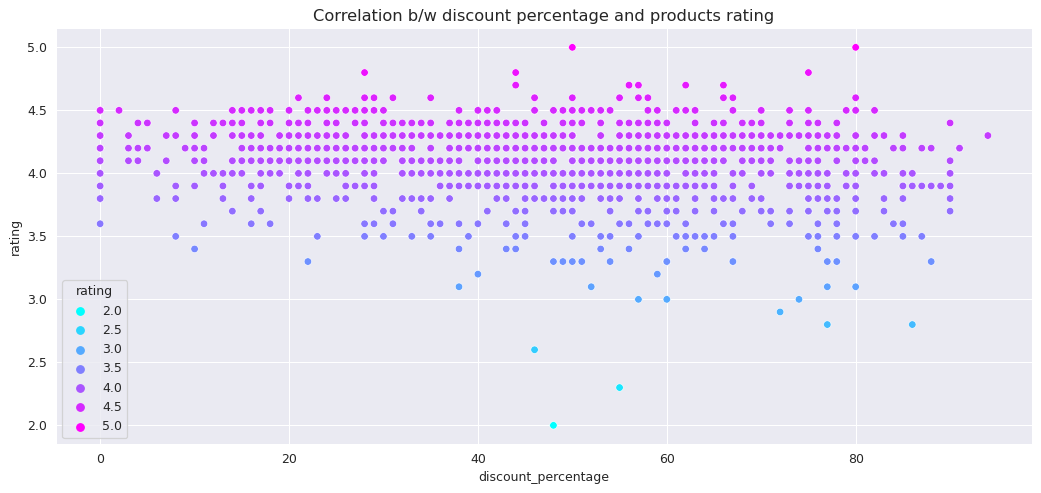

In [28]:
# Plotting the Scatter plot show the correlation between discount_percentage and product's rating
plt.figure(figsize=(14, 6), dpi=90, frameon=True)
sns.scatterplot(data=amz, x='discount_percentage', y='rating', hue='rating', palette='cool')
plt.title('Correlation b/w discount percentage and products rating', size=13)
plt.show()

# Which category has the highest average rating?

In [29]:
amz.groupby('Primary_category')['rating'].mean().reset_index()

,Primary_category,rating
0,Car&Motorbike,3.800000
1,Computers&Accessories,4.155654
2,Electronics,4.081749
3,Health&PersonalCare,4.000000
4,Home&Kitchen,4.040716
5,HomeImprovement,4.250000
6,MusicalInstruments,3.900000
7,OfficeProducts,4.309677
8,Toys&Games,4.300000


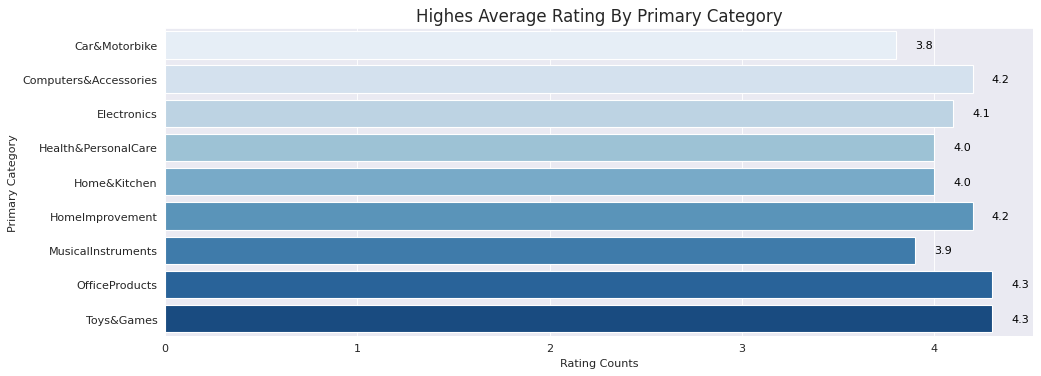

In [30]:
# Plotting the above results
pcat = amz.groupby('Primary_category')['rating'].mean().round(decimals=1)

plt.figure(figsize=(14, 5), dpi=80, frameon=True)
sns.barplot(x=pcat.values, y=pcat.index, palette='Blues')

for i, v in enumerate(pcat.values):
    plt.text(x=v+0.1, y=i, s=str(v), fontsize=10, color='black', va='center')
    
plt.title('Highes Average Rating By Primary Category', fontsize=15)
plt.xlabel('Rating Counts')
plt.ylabel('Primary Category')
plt.show()

# Is there a correlation between the product's price and its rating?

In [31]:
# Grouping the actual_price by creating bins and labels to show the correlation between product's price and its rating
pp = pd.cut(amz['actual_price'], bins=[39, 10039, 20039, 30039, 40039, 50039, 60039, 70039, 80039, 130039, 140039], labels=['39-10038','10039-20038', '20039-30038', '30039-40038', '40039-50038', '50039-60038', '60039-70038', '70039-80038', '80039-90038', '130039-140038']).value_counts().rename_axis('Price_group').reset_index(name='counts')
pp

,Price_group,counts
0,39-10038,1271
1,10039-20038,92
2,20039-30038,47
3,30039-40038,16
4,40039-50038,14
5,50039-60038,9
6,60039-70038,5
7,70039-80038,4
8,80039-90038,1
9,130039-140038,1


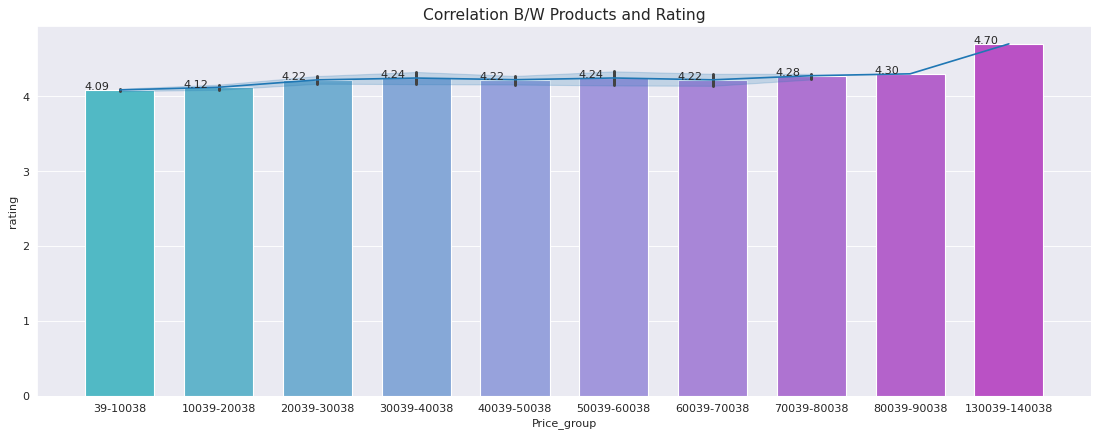

In [32]:
amz['Price_group'] = pd.cut(amz['actual_price'], bins=[39, 10039, 20039, 30039, 40039, 50039, 60039, 70039, 80039, 130039, 140039], labels=['39-10038','10039-20038', '20039-30038', '30039-40038', '40039-50038', '50039-60038', '60039-70038', '70039-80038', '80039-90038', '130039-140038'])

plt.figure(figsize=(17, 6), dpi=80, frameon=True)
ax=sns.barplot(x= 'Price_group', y='rating', data=amz, palette='cool', width=0.7, saturation=0.5)
sns.lineplot(x= 'Price_group', y= 'rating', data=amz)

for i, v in enumerate(ax.patches):
    height = v.get_height()
    ax.text(v.get_x() + v.get_width() / 6,
            height,
            '{:1.2f}'.format(height),
            ha="center",)

plt.title('Correlation B/W Products and Rating', size=14)
plt.ylabel('rating')
plt.show()

# What is the most common word in the positive and negative reviews?

**This code uses NLTK library**

In [34]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import re

# Download NLTK resources (only required once)
nltk.download('punkt')
nltk.download('stopwords')

# Preprocess reviews
def preprocess_reviews(reviews):
    # Tokenize words
    tokenized_reviews = [word_tokenize(review.lower()) for review in reviews]

    # Remove stopwords and non-alphabetic words
    stop_words = set(stopwords.words('english'))
    filtered_reviews = [[word for word in review if word not in stop_words and re.match('^[a-zA-Z]+$', word)] for review in tokenized_reviews]

    return filtered_reviews

# Preprocess review_content column
preprocessed_reviews = preprocess_reviews(amz['review_content'])

# Perform sentiment analysis and tokenize words
positive_words = []
negative_words = []
for review, rating in zip(preprocessed_reviews, amz['rating']):
    if rating >= 4.0:
        positive_words.extend(review)
    elif rating <= 2.0:
        negative_words.extend(review)

# Count word frequencies
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Identify most common words
most_common_positive_words = positive_word_counts.most_common(5)
most_common_negative_words = negative_word_counts.most_common(5)

# Display results
print("Most common words in positive reviews:", most_common_positive_words)
print("Most common words in negative reviews:", most_common_negative_words)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Most common words in positive reviews: [('good', 4751), ('product', 2754), ('quality', 1786), ('use', 1244), ('cable', 1157)]
Most common words in negative reviews: [('heater', 2), ('heating', 1), ('capacity', 1), ('zero', 1), ('initiated', 1)]


# What is the distribution of ratings across all products?

In [35]:
data = [go.Histogram(x=amz['rating'], marker=dict(color='teal'), name='Rating', opacity=0.75)]

layout = go.Layout(title='Histogram of Ratings',  xaxis=dict(title='Rating'), yaxis=dict(title='Count'))

fig = go.Figure(data=data, layout=layout)

fig.show()

# Which product has the highest number of reviews and what is its rating?

In [36]:
amz.groupby('product_name')['rating'].mean().sort_values(ascending=False).reset_index().head(10)

,product_name,rating
0,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,5.0
1,Syncwire LTG to USB Cable for Fast Charging Co...,5.0
2,"Oratech Coffee Frother electric, milk frother ...",4.8
3,Swiffer Instant Electric Water Heater Faucet T...,4.8
4,"Instant Pot Air Fryer, Vortex 2QT, Touch Contr...",4.8
5,Zuvexa USB Rechargeable Electric Foam Maker - ...,4.7
6,Spigen EZ Fit Tempered Glass Screen Protector ...,4.7
7,"FIGMENT Handheld Milk Frother Rechargeable, 3-...",4.7
8,Campfire Spring Chef Prolix Instant Portable W...,4.7
9,Multifunctional 2 in 1 Electric Egg Boiling St...,4.7


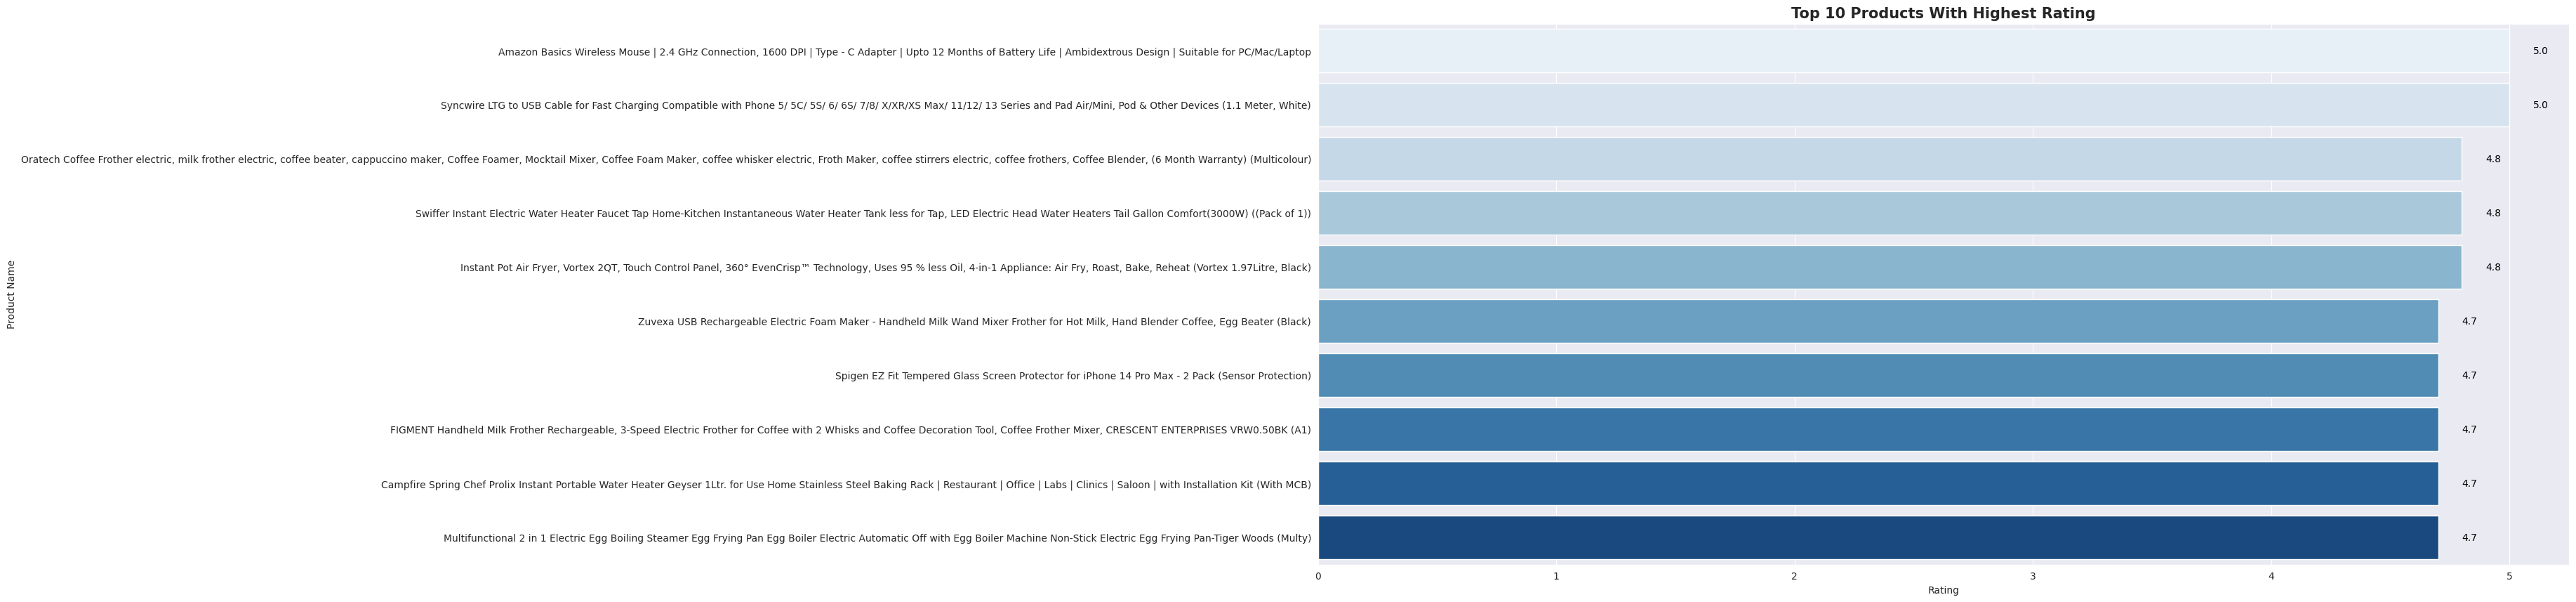

In [37]:
rating = amz.groupby('product_name')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(23, 10), frameon=True)
sns.barplot(x=rating.values, y=rating.index, palette='Blues')

for i, v in enumerate(rating.values):
    plt.text(x=v+0.1, y=i, s=str(v), fontsize=10, color='black', va='center')
    
plt.title('Top 10 Products With Highest Rating', fontsize=15, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Product Name')
plt.show()

# Identify the top 5 users who have given the most reviews?

In [38]:
amz.groupby('user_id')['review_id'].size().sort_values(ascending=False).reset_index().head()

,user_id,review_id
0,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...",10
1,"AGAELRYPMTG5SADZPDYB343EASAA,AGFN4JODOM2NTFCJQ...",8
2,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",8
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",7
4,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",7


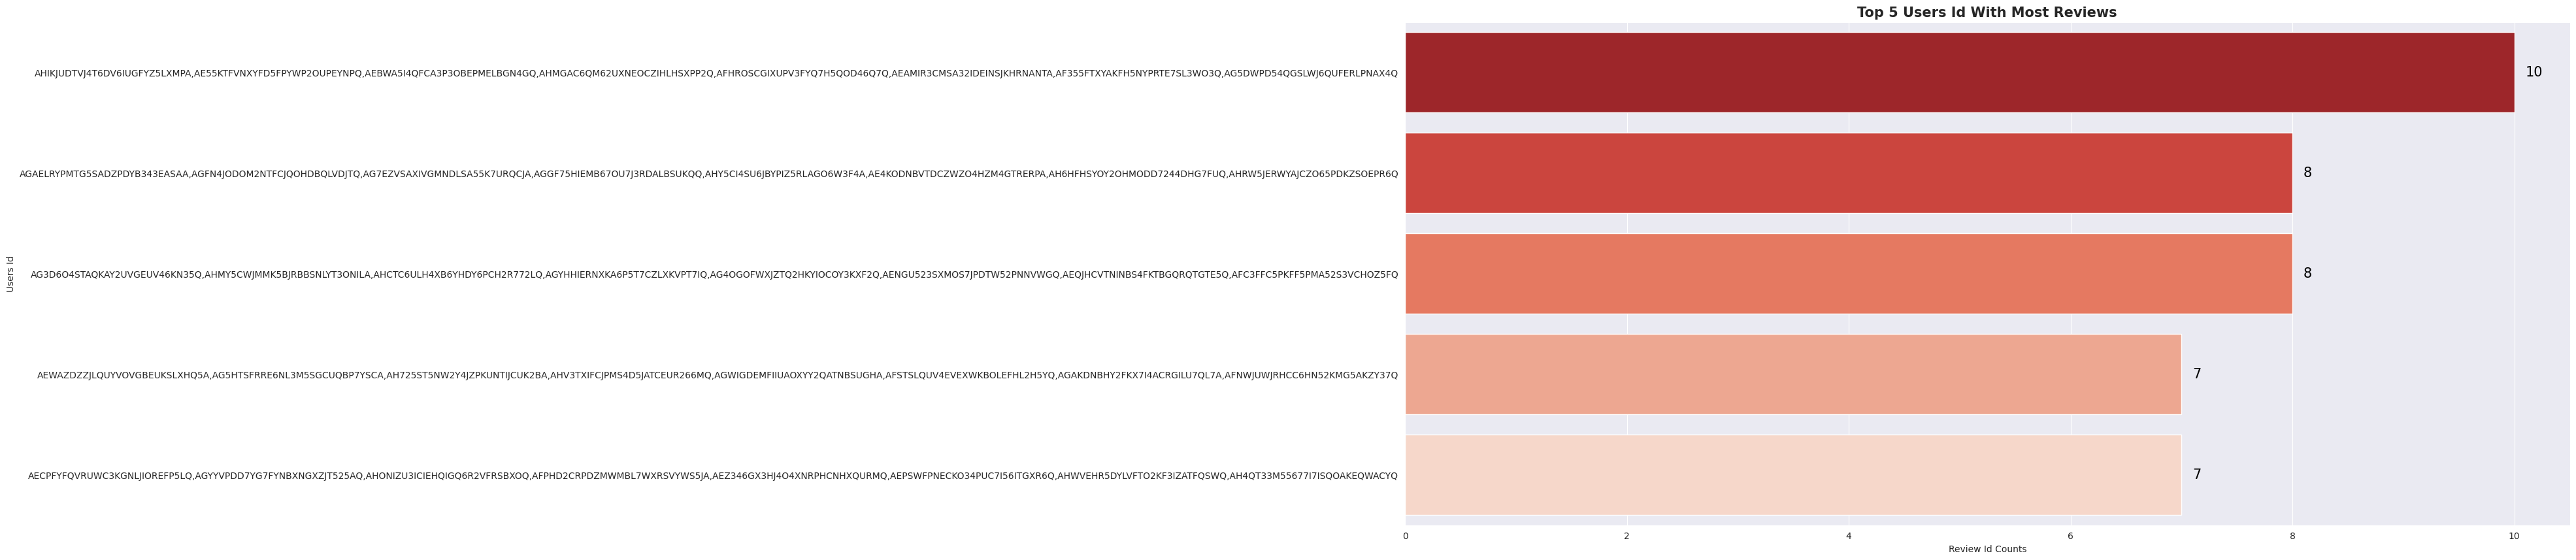

In [39]:
top_users = amz.groupby('user_id')['review_id'].size().sort_values(ascending=False).head()

plt.figure(figsize=(23, 10), frameon=True)
sns.barplot(x=top_users.values, y=top_users.index, palette='Reds_r')

for i, v in enumerate(top_users.values):
    plt.text(x=v+0.1, y=i, s=str(v), fontsize=15, color='black', va='center')
    
plt.title('Top 5 Users Id With Most Reviews', fontsize=15, fontweight='bold')
plt.xlabel('Review Id Counts')
plt.ylabel('Users Id')
plt.show()

# Is there a correlation between the length of a review and the rating given?

In [40]:
# creating a new column to represent the length of each review
amz['review_length'] = amz['review_content'].apply(len)

In [41]:
# correlation between the review length and the rating
corr = amz[['rating', 'review_length']].corr()
print(corr)

                 rating  review_length
rating         1.000000       0.078195
review_length  0.078195       1.000000


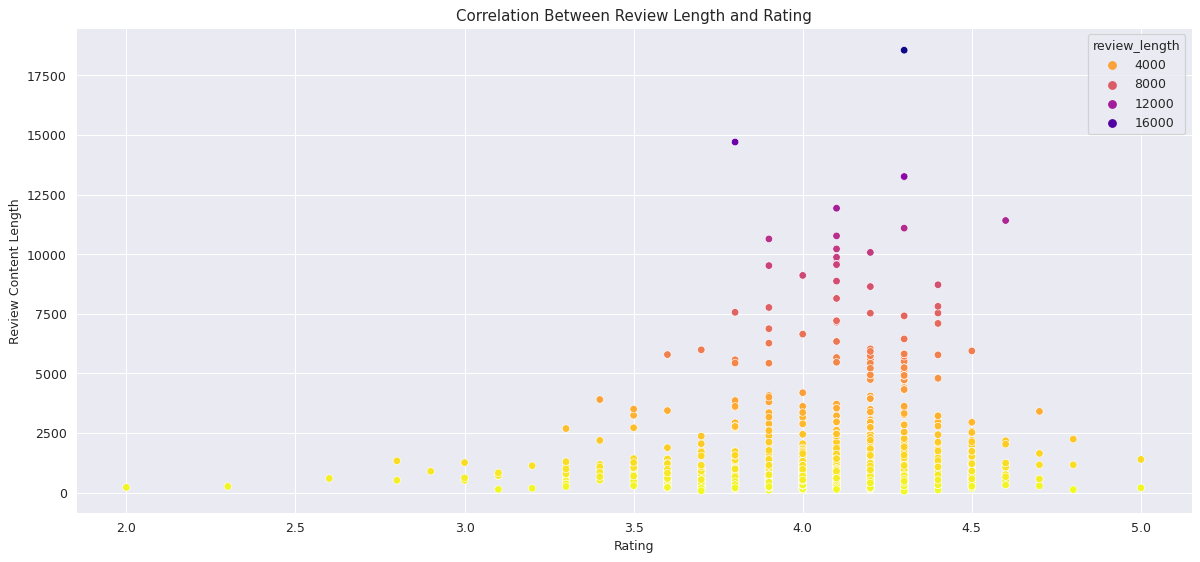

In [42]:
# Calculate the length of each review by counting the number of characters
amz['review_length'] = amz['review_content'].str.len()

plt.figure(figsize=(16, 7), dpi=90, frameon=True)
sns.scatterplot(y='review_length', x='rating', data=amz, hue='review_length', palette='plasma_r')

plt.xlabel('Rating')
plt.ylabel('Review Content Length')
plt.title('Correlation Between Review Length and Rating')
plt.show()

# Can the length of the product description be correlated to the product's rating?

In [43]:
amz['product_description_len'] = amz['about_product'].apply(len)

In [44]:
corr1 = amz[['rating', 'product_description_len']].corr()
print(corr1)

                           rating  product_description_len
rating                   1.000000                 0.022992
product_description_len  0.022992                 1.000000


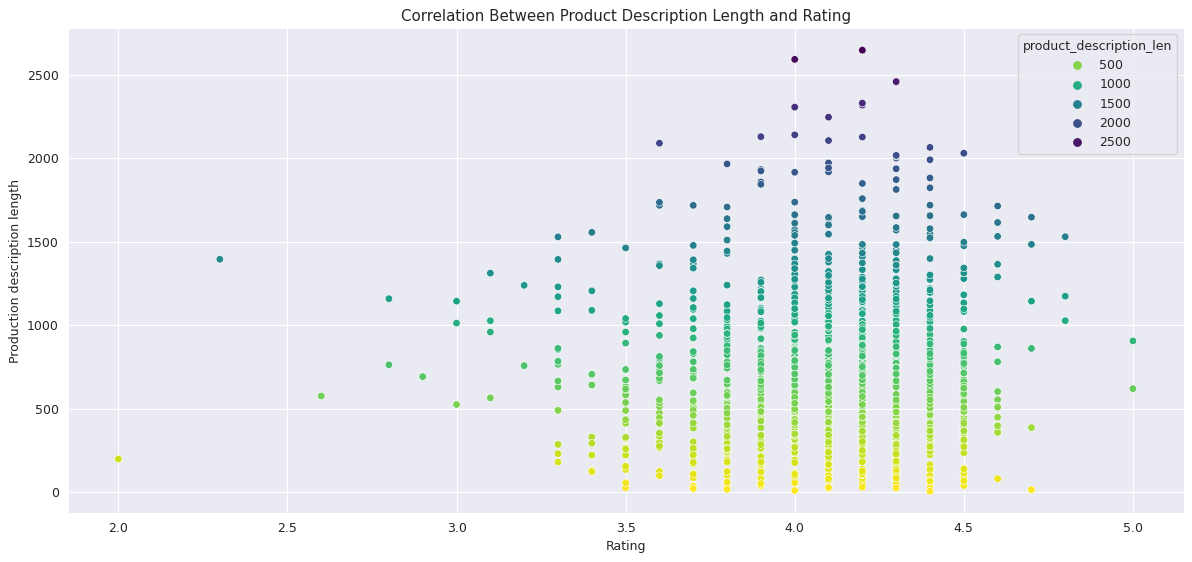

In [45]:
# amz['product_description_len'] = amz['rating'].str.len()

plt.figure(figsize=(16, 7), dpi=90, frameon=True)
sns.scatterplot(y='product_description_len', x='rating', data=amz, hue='product_description_len', palette='viridis_r')

plt.xlabel('Rating')
plt.ylabel('Production description length')
plt.title('Correlation Between Product Description Length and Rating')
plt.show()

In [46]:
amz

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,Primary_category,Price_group,review_length,product_description_len
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,507,1208,58.0,4.1,8131,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...,Computers&Accessories,39-10038,483,386
1,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,507,1208,58.0,4.1,8131,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...,Computers&Accessories,39-10038,483,386
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,749,1339,44.0,4.2,179692,150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...,Computers&Accessories,39-10038,3989,607
3,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics|GeneralPurposeBatteries&BatteryCha...,399,499,20.0,4.3,27201,Duracell Rechargeable AAA 750mAh batteries sta...,"AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...","T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...","R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...","Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",https://m.media-amazon.com/images/I/418YrbHVLC...,https://www.amazon.in/Duracell-AAA-750mAh-Rech...,Electronics,39-10038,1060,470
4,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories|Accessories&Peripherals|...,279,375,26.0,4.3,31534,"A comfortable, ambidextrous shape feels good i...","AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...","R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...","Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",https://m.media-amazon.com/images/I/31iFF1Kbkp...,https://www.amazon.in/Logitech-B100-Optical-Mo...,Computers&Accessories,39-10038,635,702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,B0BPBXNQQT,Room Heater Warmer Wall-Outlet 400 Watts Elect...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",799,1989,60.0,4.3,70,Fast Heating :- Ceramic heating element create...,"AH7ZFZAWQV5VTWQHLXZYDGFDNJGQ,AHFM667GXYFTR3AUJ...","Rajiv Ranjan Singh,Eswar Babu,Gaurav Choudhary...","RZO6XGE3P1DX,R3RCHNNZ1GVHBL,R32VH8C2WKSPBO,RHP...","Good for small rooms,Better,Good quality,Nice ...",If u have to heat a small room you can definit...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wall-Outlet-Electric-Hea...,Home&Kitchen,39-10038,486,552
1458,B0BPCJM7TB,WIDEWINGS Electric Handheld Milk Wand Mixer Fr...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,259,999,74.0,4.0,43,The battery operated milk

# CONCLUSION

**In conclusion, the analysis of Amazon product reviews uncovers valuable insights. Higher-priced products generally receive higher ratings, suggesting a correlation between price and perceived value. Additionally, longer reviews tend to accompany higher ratings, indicating that customers appreciate detailed feedback. Furthermore, there's an indication that longer product descriptions might lead to higher ratings, highlighting the importance of providing comprehensive information. Understanding these correlations can empower sellers to optimize their product listings, enhance customer satisfaction, and ultimately drive sales on the platform.**